# Corona Impact Analysis


### Model and calibration

This model has several groups

S: Individuals that are healthy and can still catch the virus. The whole population starts here.

E: Infected individuals who are currently in a non-contagious incubation time (for t_incubation days)

I: Infected individuals who are currently in a contagious incubation time

Until this point, E and I contain all infected individuals. After a few days of incubation time, the infected individuals spread in four groups:

Asymptomatic: Infected inviduals who are and remain asymptomatic and spread the virus without realising

Mild: Infected individuals who have mild to medium symptoms. Only a fraction 'p_self_quarantine' stays at home, the other fraction still spreads the virus. Policy interventions to urge sick people to stay at home will affect this fraction.

Severe and recovering: Individuals who have severe symptoms but recover, first stay at home but, then go to hospital, and eventually recover. These severely ill individuals are assumed to stay at home and in hospital after incubation and hence do not spread the virus further.

Severe and fatal: Individuals who have severe symptoms but die, first stay at home but, then go to hospital, and eventually decease. These severely ill individuals are assumed to stay at home and in hospital after incubation and hence do not spread the virus further.

The following flowchart illustrates the model:

<img src="flow.png" width="800">

## Policy options

The model allows to  think about a few policy scenarios:

1. __Influence of asymptomatic cases:__ As better estimates of the asymptomatic part of the population become available through randomised testing in then next weeks, how does this fraction affect scenarios? It can be set in the model.

2. __Potential of isolating sick people only:__ How much improvement can be optained by just asking sick individuals with symptoms to stay at home? The probility 'p_self_quarantine' allows to adjust the fraction of sick individuals who will self-quarantine and comply with the recommendation.

3. __Potential of (repeated) social distancing:__ Stronger than the previous part, additional mandatory social distancing steps can be set as a schedule over the coming months. For example, what would happen in the model if weeks of zero social distancing alternated with weeks where 85% of the population followed social distancing?

<br>

The model thereby should also allow to compute an estimate of the population's R0 at any given point in time of the policy schedule. First prior to running the model, a beta value has to be chosen in line with research. This beta signals how likely an infected individual passes on the illness on a given day. Now at every point in time: Compute group sizes I, E, etc., compute individual R0_group as beta/illness_duration_group, and then weight the different R0_group according to group sizes to obtain an aggregate R0 at the point in time.

<br>


In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2
from functools import partial
from datetime import date

import ipywidgets as widgets
import numpy as np
import pandas as pd
from pandas.testing import assert_series_equal
import seaborn as sns

from seir import Seir
from inputs import params, start

In [2]:
sns.set_style("white")

In [4]:
def update_results(
    start,
    params,
    # Policy
    policy_period0,
    policy_period1,
    policy_period2,
    policy_period3,
    policy_period4,
    date_period0,
    date_period1,
    date_period2,
    date_period3,
    date_period4,
    # Parameters
    # Starting Values
):

    policy = [
        (date_period0, policy_period0),
        (date_period1, policy_period1),
        (date_period2, policy_period2),
        (date_period3, policy_period3),
        (date_period4, policy_period4),
    ]

    # params={}
    # start={}

    # Run
    seir = Seir(params=params, start=start)
    seir.simulate(policy)
    seir.plot_summary()
    return None


update_results_partial = partial(update_results, start=start, params=params)

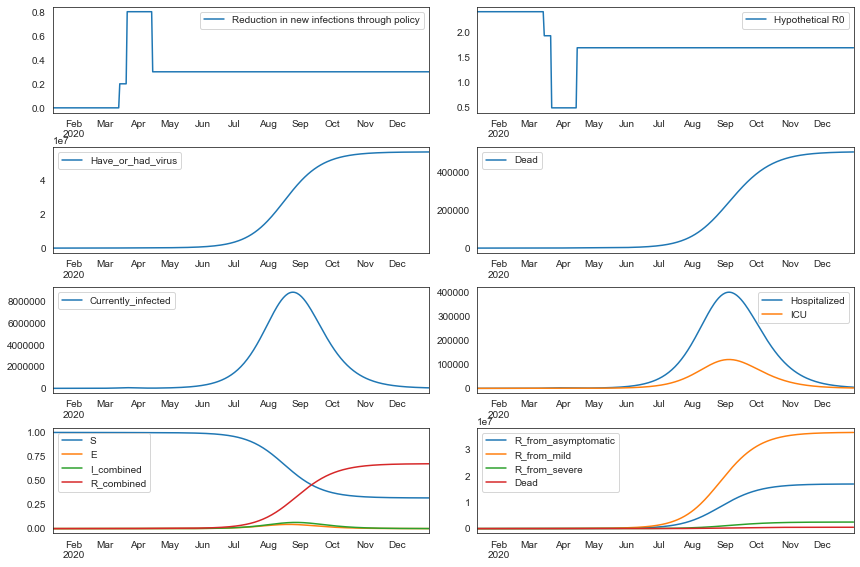

In [5]:
def policy_widget(description, date, policy=0):
    text_box = widgets.Text(value=date, description=description, disabled=False,)
    float_box = widgets.FloatSlider(
        value=policy,
        min=0,
        max=1,
        step=0.1,
        description="Policy Strength",
        disabled=False,
        continuous_update=False,
        orientation="horizontal",
        readout=True,
        readout_format=".1f",
    )
    return text_box, float_box


# Policy Box
text_box0, float_box0 = policy_widget("Beginning of simulation", "2020-01-12", policy=0)
text_box1, float_box1 = policy_widget("Policy intervention 1", "2020-03-14", policy=0.2)
text_box2, float_box2 = policy_widget("Policy intervention 2", "2020-03-21", policy=0.8)
text_box3, float_box3 = policy_widget("Policy intervention 3", "2020-04-14", policy=0.3)
text_box4, float_box4 = policy_widget("End of simulatiion", "2020-12-31")


policy_box = widgets.VBox(
    [
        widgets.HBox([text_box0, float_box0]),
        widgets.HBox([text_box1, float_box1]),
        widgets.HBox([text_box2, float_box2]),
        widgets.HBox([text_box3, float_box3]),
        widgets.HBox([text_box4, float_box4]),
    ]
)

# Parameters (placeholder)
parameters_box = widgets.VBox()

# Starting Values (placeholder)
start_box = widgets.VBox()

# Combine inputs in tabs
input_tab = widgets.Tab()
input_tab.children = [policy_box, parameters_box, start_box]
input_tab.set_title(0, "Policy")
input_tab.set_title(1, "Parameters")
input_tab.set_title(2, "Starting Values")

# Output box
output_box = widgets.interactive_output(
    update_results_partial,
    {
        "policy_period0": float_box0,
        "policy_period1": float_box1,
        "policy_period2": float_box2,
        "policy_period3": float_box3,
        "policy_period4": float_box4,
        "date_period0": text_box0,
        "date_period1": text_box1,
        "date_period2": text_box2,
        "date_period3": text_box3,
        "date_period4": text_box4,
    },
)

# Combination
dash = widgets.VBox([output_box, input_tab])
dash